From the final data file, let's create some visualizations to help us find some trends and build our model.

In [1]:
# Import 3rd party libraries",
import os
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
import numpy as np

# Configure Notebook
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

In [2]:
data = pd.read_csv('this_is_the_completed_csv!.csv') # read the csv and assign it to a variable
data = data.set_index('address') # set the index as the address
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56790 entries, 38-bellefontaine-street to 5-callowhill-drive
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Price                                     56790 non-null  float64
 1   propertyLng                               56790 non-null  float64
 2   propertyLat                               56790 non-null  float64
 3   T_Detached                                56790 non-null  int64  
 4   T_Semi-Detached                           56790 non-null  int64  
 5   T_other                                   56790 non-null  int64  
 6   Utilities                                 56790 non-null  float64
 7   Rooms                                     56790 non-null  float64
 8   Bathrooms                                 56790 non-null  float64
 9   Kitchens                                  56790 non-null  float64
 10  Bedr

Let's see how the type of house influences the price

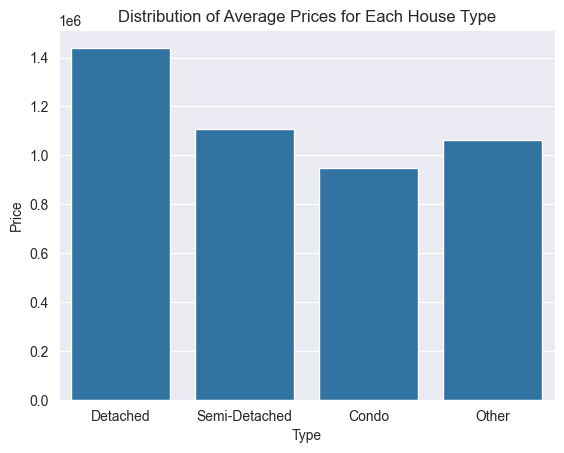

In [3]:
temp_y = [data[data['T_Detached'] == 1]['Price'].mean(),
        data[data['T_Semi-Detached'] == 1]['Price'].mean(),
        data[(data['T_Detached'] == 0) & (data['T_Semi-Detached'] == 0) & (data['T_other'] == 0)]['Price'].mean(),
        data[data['T_other'] == 1]['Price'].mean()]

temp_x = ['Detached', 'Semi-Detached', 'Condo', 'Other']

plt.title('Distribution of Average Prices for Each House Type')
plt.xlabel('Type')
plt.ylabel('Price')

sns.barplot(x = temp_x, y = temp_y)
plt.show()

Plot Rooms vs the Price.  Seems like there are some outliers with 0 rooms, lets see how many, maybe they need to be filtered out at some point.

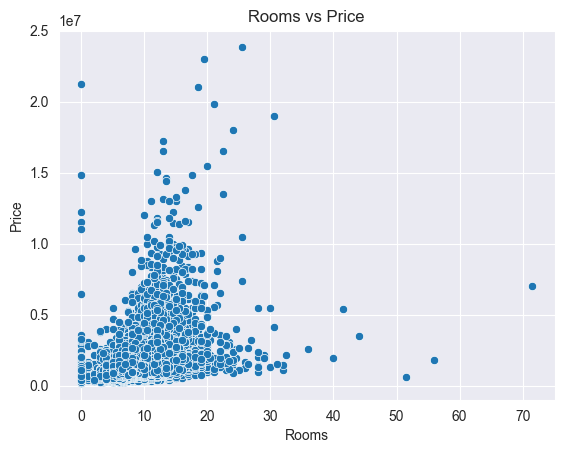

Number of houses with no rooms is 131


In [4]:
ax = sns.scatterplot(data = data, x = 'Rooms', y = 'Price')
plt.title('Rooms vs Price')
plt.show()
print('Number of houses with no rooms is ' + str(len(data[data['Rooms'] == 0])))

Plot Bathrooms vs the Price.  Seems like there are also some outliers with 0 bathrooms, lets see how many, maybe they need to be filtered out at some point.

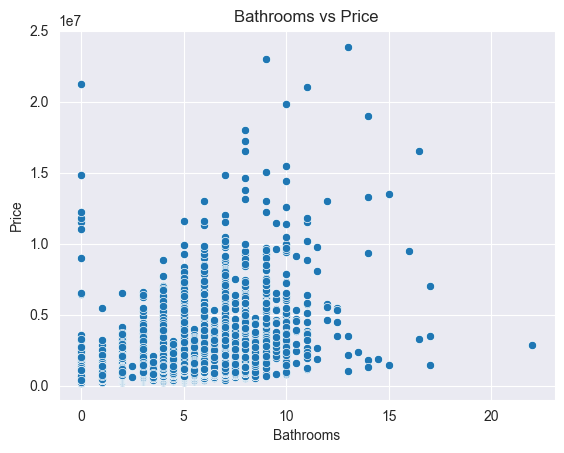

Number of houses with no bathrooms is 132


In [5]:
sns.scatterplot(data = data, x = 'Bathrooms', y = 'Price')
plt.title('Bathrooms vs Price')
plt.show()
print('Number of houses with no bathrooms is ' + str(len(data[data['Bathrooms'] == 0])))

Plot Kitchens vs the Price.  Seems like there are also some outliers with 0 kitchens, lets see how many, maybe they need to be filtered out at some point.

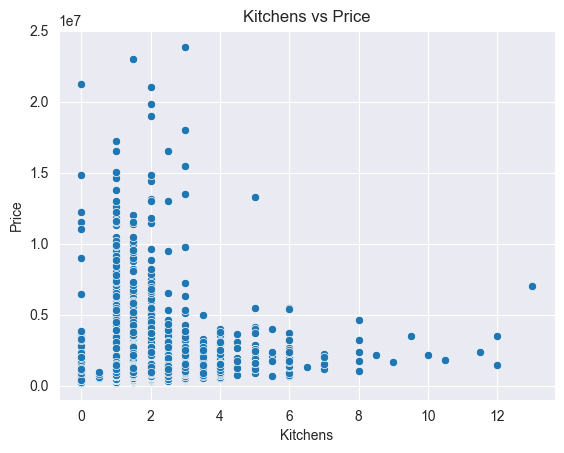

Number of houses with no kitchens is 154


In [6]:
sns.scatterplot(data = data, x = 'Kitchens', y = 'Price')
plt.title('Kitchens vs Price')
plt.show()
print('Number of houses with no kitchens is ' + str(len(data[data['Kitchens'] == 0])))

Plot Bedrooms vs the Price.  Seems like there are also some outliers with 0 bedrooms, lets see how many, maybe they need to be filtered out at some point.

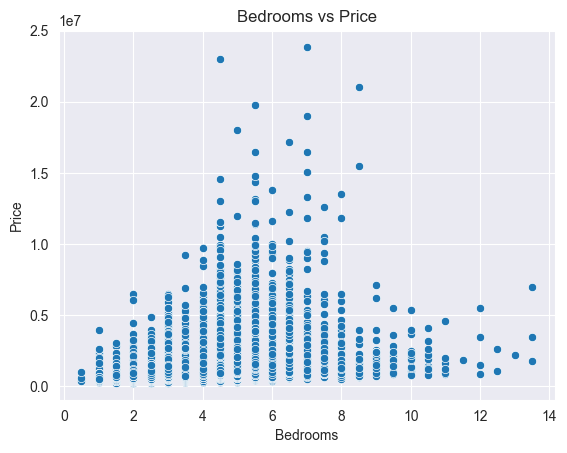

Number of houses with no bedrooms is 153


In [7]:
sns.scatterplot(data = data[data['Bedrooms'] > 0], x = 'Bedrooms', y = 'Price')
plt.title('Bedrooms vs Price')
plt.show()
print('Number of houses with no bedrooms is ' + str(len(data[data['Bedrooms'] == 0])))

Plot Basement types for each plot.  Lots of variation in the zero basements.  Some slight trends.

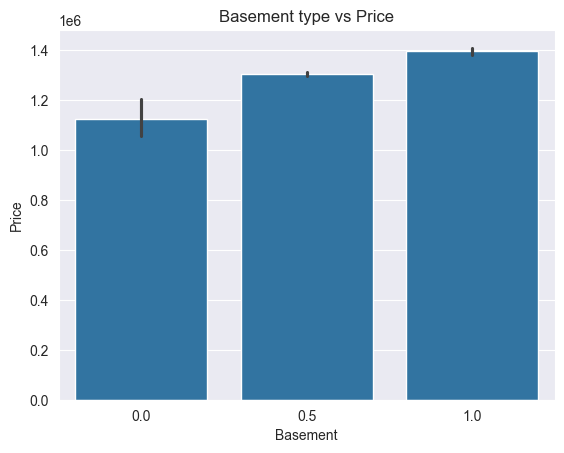

In [8]:
sns.barplot(data = data, x = 'Basement', y = 'Price')
len(data[data['Basement'] == 0])
plt.title('Basement type vs Price')
plt.show()

Lets look at the number of parking spots vs price.  Once again, 0 has a large variation, but overall it doesn't seem like parking tells us much.

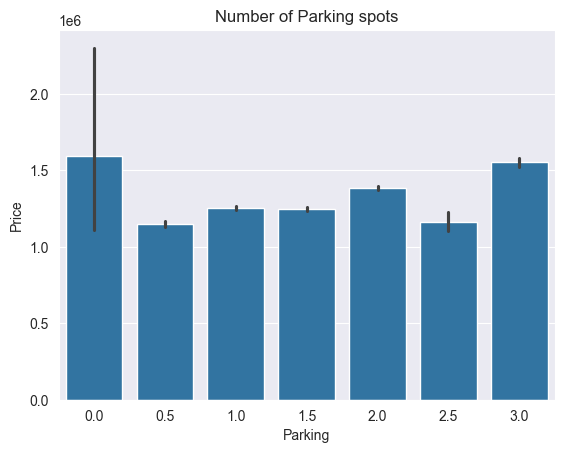

In [9]:
sns.barplot(data = data, x = 'Parking', y = 'Price')
plt.title('Number of Parking spots')
plt.show()

If we can compare houses with and without fireplaces, there is a large difference between the prices.

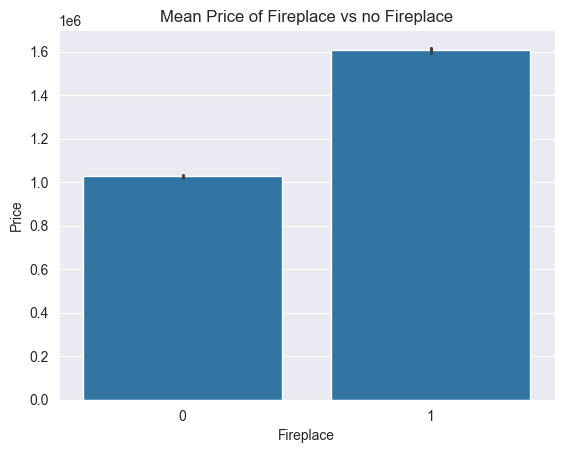

In [10]:
sns.barplot(data = data, x = 'Fireplace', y = 'Price')
plt.title('Mean Price of Fireplace vs no Fireplace')
plt.show()

There is maybe not as much of a difference between houses with and without pools.

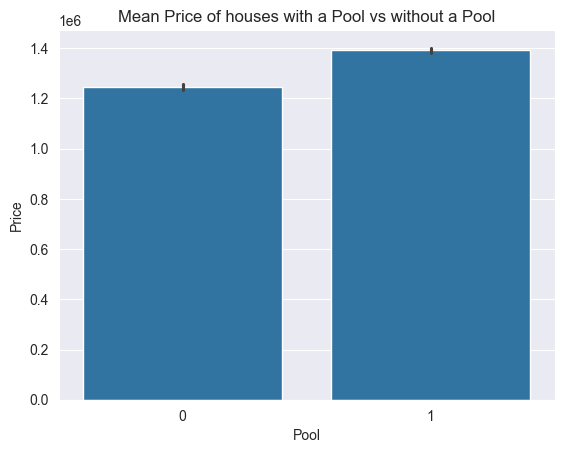

In [11]:
sns.barplot(data = data, x = 'Pool', y = 'Price')
plt.title('Mean Price of houses with a Pool vs without a Pool')
plt.show()

If we look at the influence of being near the waterfront, we can see a slight increase in price near the water front, but there is also a lot of variation.

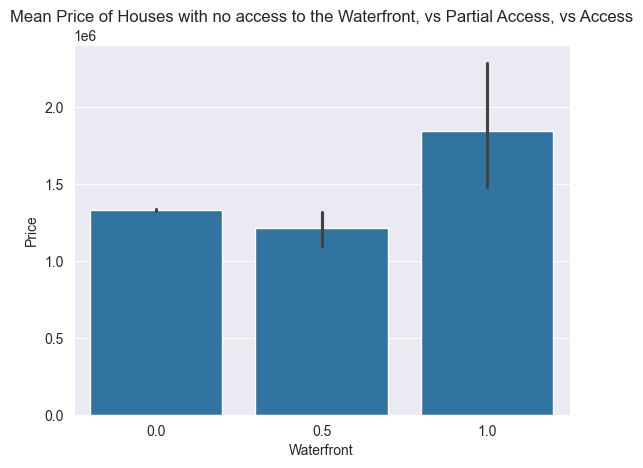

In [12]:
sns.barplot(data = data, x = 'Waterfront', y = 'Price')
plt.title('Mean Price of Houses with no access to the Waterfront, vs Partial Access, vs Access')
plt.show()

Houses with some sort of feature seem to have an increased mean price as well, but nothing too significant.

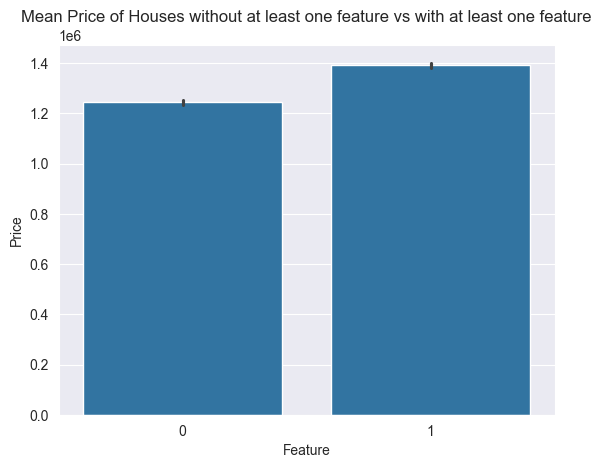

In [13]:
sns.barplot(data = data, x = 'Feature', y = 'Price')
plt.title('Mean Price of Houses without at least one feature vs with at least one feature')
plt.show()

Intuitively, it would seem as if size has a big influence over price, let's see if that's true.

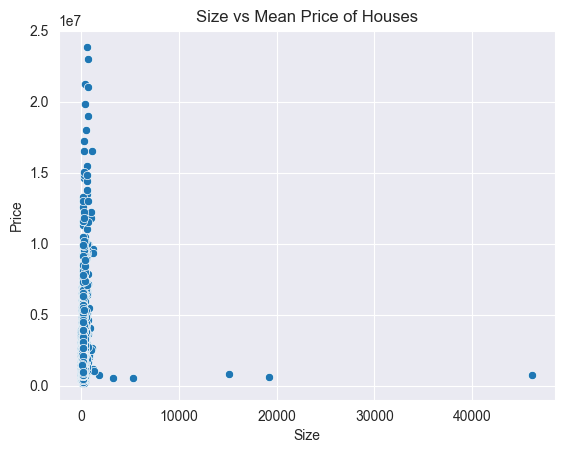

In [14]:
sns.scatterplot(data, x = data['Size'], y = data['Price'])
plt.title('Size vs Mean Price of Houses')
plt.show()

It seems like there are some houses which are much large than others.  Let's investigate a bit.

In [15]:
print('Number of houses with a size greater than 1000 is ' + str(len(data[data['Size']>1000])))
data[data['Size']>1000]['Size'].head(14) #Print the Houses

Number of houses with a size greater than 1000 is 14


address
50-meadowcliffe-drive       1121.35
84-cliffcrest-drive         5344.00
16-pinoak-street            3222.83
42-park-lane-circle         1209.05
48-park-lane-circle         1179.00
10-hyde-park-circle         1103.36
53-pidgeon-street           1804.00
18-spring-forest-square    46128.52
55-jacob-fisher-drive      19172.99
6-hyde-park-circle          1028.83
187-torbarrie-road         15113.38
72-the-bridle-path          1005.16
498-vaughan-road            1164.00
80-courton-drive            1299.99
Name: Size, dtype: float64

If we plot a barplot of the price using different bins of sizes we can see a clear trend until about 450, then it drops a bit, then there is a large jump up to 550.  We can roughly see what would be considered a small vs medium house on the market, and then it is quite clear what is a large house.

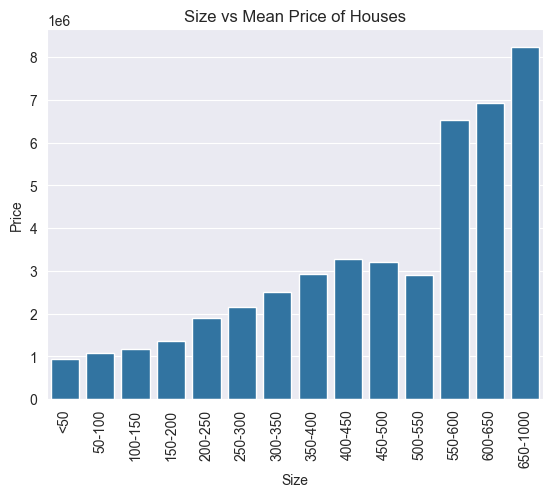

In [16]:
# Divide the houses into different bins based off their size
temp_y = [data[data['Size'] < 50]['Price'].mean(),
        data[(data['Size'] > 50) & (data['Size'] < 100)]['Price'].mean(),
        data[(data['Size'] > 100) & (data['Size'] < 150)]['Price'].mean(),
        data[(data['Size'] > 150) & (data['Size'] < 200)]['Price'].mean(),
         data[(data['Size'] > 200) & (data['Size'] < 250)]['Price'].mean(),
         data[(data['Size'] > 250) & (data['Size'] < 300)]['Price'].mean(),
         data[(data['Size'] > 300) & (data['Size'] < 350)]['Price'].mean(),
         data[(data['Size'] > 350) & (data['Size'] < 400)]['Price'].mean(),
         data[(data['Size'] > 400) & (data['Size'] < 450)]['Price'].mean(),
         data[(data['Size'] > 450) & (data['Size'] < 500)]['Price'].mean(),
         data[(data['Size'] > 500) & (data['Size'] < 550)]['Price'].mean(),
         data[(data['Size'] > 550) & (data['Size'] < 600)]['Price'].mean(),
         data[(data['Size'] > 600) & (data['Size'] < 650)]['Price'].mean(),
         data[(data['Size'] > 650) & (data['Size'] < 1000)]['Price'].mean()]

temp_x = ['<50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500',
          '500-550', '550-600', '600-650', '650-1000']

ax = sns.barplot(x = temp_x, y = temp_y)
ax.tick_params(axis='x', rotation=90)
plt.title('Size vs Mean Price of Houses')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

Finally, lets look to see if the fronting, or way the house faces, influences the mean prince significantly. We can see from the barplot that there is not much of an influence.

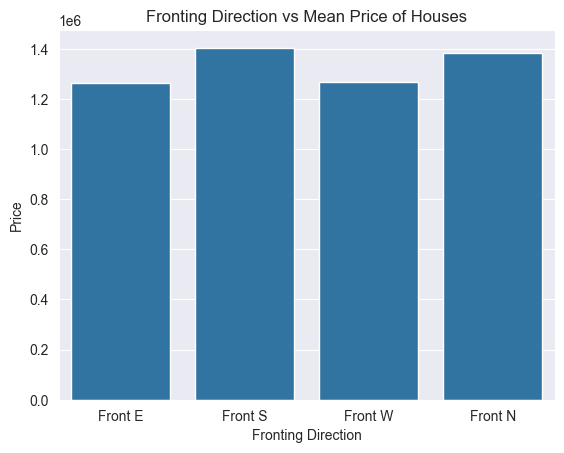

In [17]:
temp_y = [data[data['Front_E'] == 1]['Price'].mean(),
        data[data['Front_S'] == 1]['Price'].mean(),
        data[data['Front_W'] == 1]['Price'].mean(),
        data[(data['Front_E'] == 0) & (data['Front_S'] == 0) & (data['Front_W'] == 0)]['Price'].mean()]

temp_x = ['Front E', 'Front S','Front W', 'Front N']

sns.barplot(x = temp_x, y = temp_y)
plt.title('Fronting Direction vs Mean Price of Houses')
plt.xlabel('Fronting Direction')
plt.ylabel('Price')
plt.show()

Visualization for the data collected

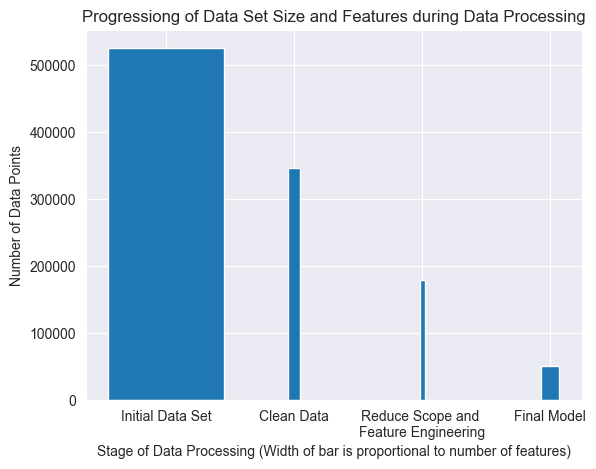

In [18]:
plt.bar(['Initial Data Set', 'Clean Data', 'Reduce Scope and \nFeature Engineering', 'Final Model'], [525919, 346211, 178048, 50575], [0.9, 0.1, 0.04, 0.14]) 

plt.xlabel("Stage of Data Processing (Width of bar is proportional to number of features)") 
plt.ylabel("Number of Data Points") 
plt.title("Progressiong of Data Set Size and Features during Data Processing") 
plt.show()